<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

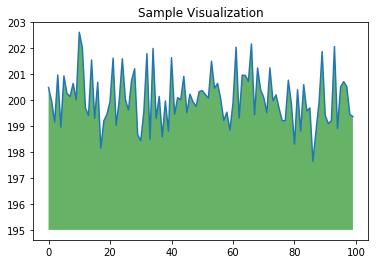

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

In [1]:
#Import the libraries 
import pandas as pd 
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import CountVectorizer 

In [2]:
#Load the data 
from google.colab import files 
uploaded = files.upload()

Saving IMDB-Movie-Data.csv to IMDB-Movie-Data.csv


In [4]:
#store the data
df = pd.read_csv('IMDB-Movie-Data.csv')
#show the first 3 rows of data 
df.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


In [5]:
#Get a count of the number of rows/movies in the data set and the number of colums
df.shape

(1000, 12)

In [6]:
#Create a list of important colums for the recommendations engine 
columns = ['Actors', 'Director', 'Genre','Title']

In [8]:
#Show the data
df[columns].head(3)

,Actors,Director,Genre,Title
0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",James Gunn,"Action,Adventure,Sci-Fi",Guardians of the Galaxy
1,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",Ridley Scott,"Adventure,Mystery,Sci-Fi",Prometheus
2,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",M. Night Shyamalan,"Horror,Thriller",Split


In [9]:
#Check for any missing values in the important columns 
df[columns].isnull().values.any()

False

In [18]:
#create a function to combine the values of the important columns into a single string 
def get_important_features(data):
	important_features = []
	for i in range(0, data.shape[0]):
		important_features.append(data['Actors'][i]+' '+data['Director'][i]+' '+data['Genre'][i]+' '+data['Title'][i])

	return important_features 

In [19]:
#create a column to hold the combines strings 
df['important_features'] = get_important_features(df)

In [20]:
#show the data
df.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,important_features
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."


In [22]:
#convert the text to a matrix of token counts 
cm = CountVectorizer().fit_transform(df['important_features'])

In [24]:
#Get the cosine similiarity matrix from the count matrix
cs = cosine_similarity(cm)
#print the cosine similairty matrix 
print(cs)

[[1.         0.1767767  0.06085806 ... 0.0571662  0.06537205 0.        ]
 [0.1767767  1.         0.         ... 0.         0.06933752 0.        ]
 [0.06085806 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.0571662  0.         0.         ... 1.         0.06726728 0.        ]
 [0.06537205 0.06933752 0.         ... 0.06726728 1.         0.07161149]
 [0.         0.         0.         ... 0.         0.07161149 1.        ]]


In [25]:
#Get the shape of the cosine similarity matrix 
cs.shape

(1000, 1000)

In [26]:
#Get the title of the movie that the user likes 
title = 'The Amazing Spider-Man'

In [34]:
#Get the title of the movie that the user likes 
title = 'The Amazing Spider-Man'

#Find the movies id 
movie_id = df[df.Title == title]['Rank'].values[0]

In [35]:
#create a list of enumerations for the similarities score [ (movie_id, similairity score), (...) ]
scores = list(enumerate(cs[movie_id]))


In [36]:
#sort the list 
sorted_scores = sorted(scores, key = lambda x:x[1], reverse = True)
sorted_scores = sorted_scores[1:]

In [37]:
#print the sorted scores 
print(sorted_scores)


[(516, 0.25048971643405976), (177, 0.2369395511036369), (619, 0.21535276082326618), (72, 0.21483446221182984), (26, 0.20701966780270625), (89, 0.20701966780270625), (91, 0.20701966780270625), (149, 0.20701966780270625), (373, 0.20701966780270625), (488, 0.20701966780270625), (718, 0.20701966780270625), (856, 0.20701966780270625), (920, 0.20701966780270625), (29, 0.19999999999999996), (58, 0.19999999999999996), (210, 0.19999999999999996), (232, 0.19999999999999996), (301, 0.19999999999999996), (355, 0.19999999999999996), (385, 0.19999999999999996), (693, 0.19999999999999996), (735, 0.19999999999999996), (787, 0.19999999999999996), (880, 0.19999999999999996), (125, 0.19364916731037082), (387, 0.19364916731037082), (436, 0.19364916731037082), (576, 0.19364916731037082), (603, 0.19364916731037082), (854, 0.19364916731037082), (107, 0.1878672873255448), (268, 0.1878672873255448), (491, 0.1878672873255448), (126, 0.18257418583505536), (163, 0.18257418583505536), (234, 0.18257418583505536), (

In [39]:
#create a loop to print the first 7 similar movies
j = 0
print('The 7 most recommended movies to', title, 'are:\n')
for item in sorted_scores:
	movie_title = df[df.Rank == item[0]]['Title'].values[0]
	print(j+1, movie_title)
	j= j+1
	if j>6:
		break


The 7 most recommended movies to The Amazing Spider-Man are:

1 Easy A
2 Dawn of the Planet of the Apes
3 Mr. Right
4 Allied
5 Paris pieds nus
6 The Hateful Eight
7 Prisoners
